In [14]:
import glob
import json
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

# Load Data

In [3]:
df=pd.read_csv('C:/Users/akhan.extern/Desktop/jsondata/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Exploration

In [4]:
print("Summary statistics of numerical features : \n", df.describe())

print("\nTotal number of reviews: ",len(df))
print("\nTotal number of unique products: ", len(list(set(df['ProductId']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Score']==3]["Score"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Score']>3]["Score"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Score']<3]["Score"].count()/len(df)*100))

Summary statistics of numerical features : 
                   Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.3512

# Data Visualization

Text(0.5, 1.0, 'Number of Reviews for Top 30 Products')

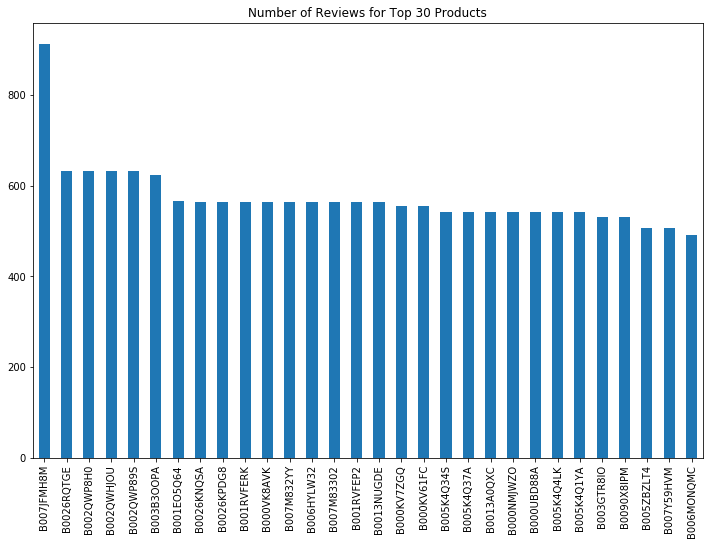

In [7]:
# Plot number of reviews for top 30 products
products = df["ProductId"].value_counts()
plt.figure(figsize=(12,8))
products[:30].plot(kind='bar')
plt.title("Number of Reviews for Top 30 Products")

# NLP

In [52]:
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)
# Words,Sents = tokenize_words_Sents(df.loc[:, 'Summary'].tolist())
Words,Sents = tokenize_words_Sents(df.iloc[5,8])
print("Words ",Words)
print("Sents ",Sents)

Words  ['Great', '!', 'Just', 'as', 'good', 'as', 'the', 'expensive', 'brands', '!']
Sents  ['Great!', 'Just as good as the expensive brands!']


In [53]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{"shouldn't", 'it', 'own', 'yours', 'down', "couldn't", 'couldn', 'which', 'themselves', 'don', 'o', 'aren', "hasn't", 'of', 'will', 'wasn', 'so', 'ma', 'too', "doesn't", "needn't", 'after', 'some', 'mustn', 'a', 'few', 'll', "haven't", 'on', 'above', 'myself', 'him', 'or', 'have', 'been', 'against', 'ourselves', 'just', 're', 'by', 'do', 'an', 'is', "don't", 'having', 'into', 'out', 'only', "mightn't", 'both', "won't", "should've", "didn't", 'she', 'up', 'does', 'about', 'my', "wasn't", 'did', 'was', 'them', 'are', 'who', 'once', "it's", 'than', 'didn', 'this', 'theirs', 'each', "mustn't", 'when', 'herself', 'y', 'as', 'if', 'hasn', 'doesn', 'wouldn', 'being', "you'd", 'm', 'can', 'other', "wouldn't", 'between', 'not', 'shouldn', 'while', 'those', 'should', 'very', "shan't", 'me', 'ain', 'most', "you'll", 'under', 'isn', 'be', 'until', 'the', 's', 'hadn', 't', 'these', 'doing', "hadn't", 'off', 'for', 've', 'to', 'mightn', 'through', 'ours', 'further', 'more', 'her', 'd', 'needn', 'yo

# Data Preparation

I only consider reviews with positive sentiment (rating = 4, 5) and negative sentiment (rating = 1, 2), and drop reviews with neutral sentiment (rating 3).

In [20]:

# Drop missing values
df.dropna(inplace=True)
# Remove any 'neutral' ratings equal to 3
# df = df[df['Score'] != 3]
df =df.query('Score != 3 & Score != 2')
# Encode 4s and 5s as (positive sentiment) and 1s and 2s as (negative sentiment)
df['Sentiment'] = np.where(df['Score'] > 3, 'positive', 'negative')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive


In [21]:
negative = df.loc[df['Sentiment'] == 'negative']
negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,negative
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",negative
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",negative
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,negative


In [35]:
neg=negative[negative["Summary"].str.contains('good|product')==False]
neg.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,negative
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",negative
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",negative
73,74,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...,negative


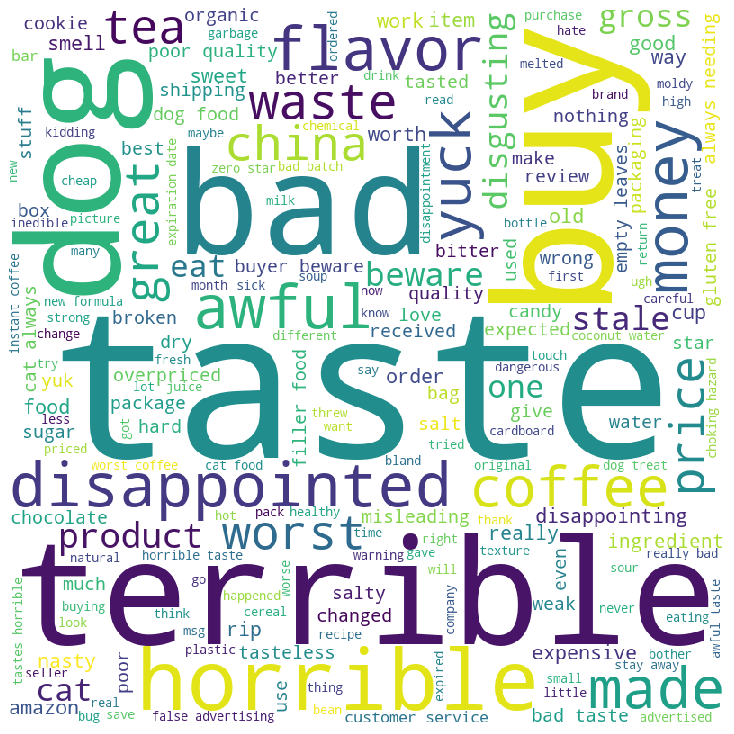

In [36]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in neg.Summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [39]:
positive_review = df.loc[df['Sentiment'] == 'positive']
positive_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive


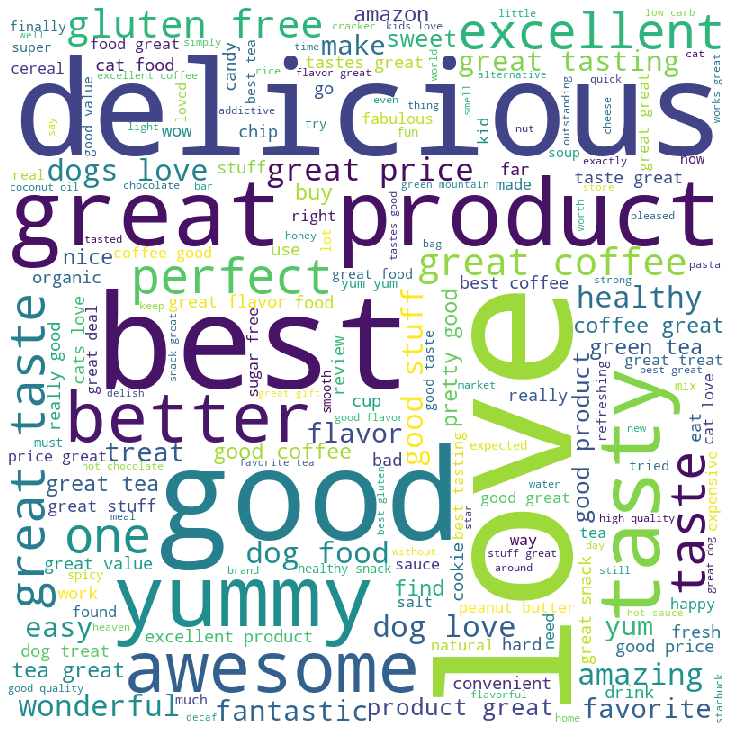

In [41]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in positive_review.Summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# convert unix time into date time

In [57]:
df['date'] = pd.to_datetime(df['Time'],unit='s')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,date
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,2008-08-18
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,2012-10-21
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive,2012-07-12


In [58]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [59]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,date,year,month
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,2011-04-27,2011,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,2012-09-07,2012,9
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,2008-08-18,2008,8
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,2012-10-21,2012,10
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive,2012-07-12,2012,7


In [60]:
df1 =df.query('year == 2011 & month == 4')
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,date,year,month
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,2011-04-27,2011,4
40,41,B001EO5QW8,AQCY5KRO7489S,Garrett,0,0,5,1303430400,Why wouldn't you buy oatmeal from Mcanns? Tast...,The variety packs taste great!<br /><br />I ha...,positive,2011-04-22,2011,4
41,42,B001EO5QW8,A1WK4ALVZDYPUE,"Dick Baldwin ""christobe""",0,0,5,1302134400,Oatmeal For Oatmeal Lovers,McCann's makes oatmeal for every oatmeal conno...,positive,2011-04-07,2011,4
96,97,B0019CW0HE,A18AAABCIJKC5Q,Rhiever,0,0,5,1303776000,Great dog food,My 1-1/2 year old basenji/jack russell mix lov...,positive,2011-04-26,2011,4
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,positive,2011-04-03,2011,4


In [61]:
df.to_csv('C:/Users/akhan.extern/Desktop/modify_review.csv')